<a href="https://colab.research.google.com/github/Guilherme774/Data-Science-and-Machine-Learning-Projects/blob/master/Intro_TensorFlow_Clothes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Librariesauxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [ ]:
# Importe a base de dados Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

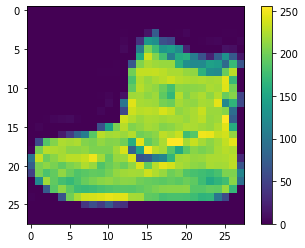

In [ ]:
# Pré-processamento dos dados
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

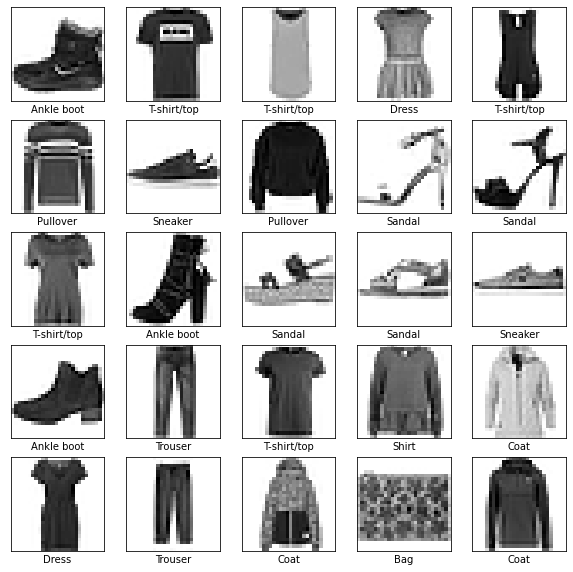

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Construindo o modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # transforma o formato da imagem de um array de imagens de duas dimensões, para um array de uma dimensão
    keras.layers.Dense(128, activation='relu'), # 
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compilando o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Treinando o modelo
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.6311 - accuracy: 0.6902
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7050 - accuracy: 0.7528
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6072 - accuracy: 0.7792
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5697 - accuracy: 0.7940
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5341 - accuracy: 0.8132
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5124 - accuracy: 0.8237
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4911 - accuracy: 0.8316
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4821 - accuracy: 0.8346
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4764 - accuracy: 0.8377
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.467

In [ ]:
# Avaliando o modelo
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.5556 - accuracy: 0.8212

Test accuracy: 0.8212000131607056


In [ ]:
# Fazendo predições

In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([2.9080121e-07, 2.1967872e-09, 1.8013292e-09, 1.5839442e-09,
       1.2810057e-07, 3.1014197e-03, 1.6771968e-06, 1.3605871e-02,
       6.4833730e-05, 9.8322576e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
# Mostrando Gráficamente os resultados/predições
  # Azul Acertividade | Vermelho Erro

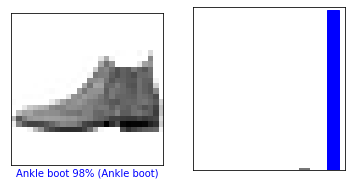

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

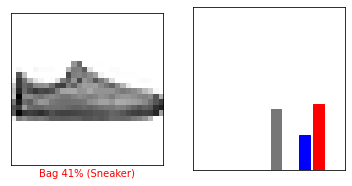

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

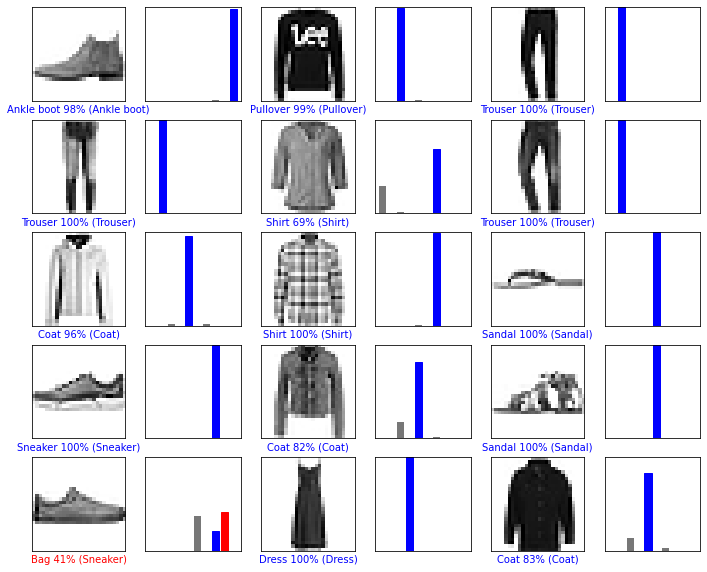

In [ ]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


In [ ]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.9080121e-07 2.1967912e-09 1.8013292e-09 1.5839442e-09 1.2810044e-07
  3.1014197e-03 1.6771968e-06 1.3605858e-02 6.4833723e-05 9.8322576e-01]]


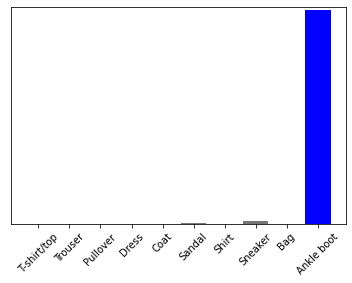

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

9